In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
import pylab as pl 
import numpy as np 
%matplotlib inline


In [17]:
df = pd.read_csv(r'T:\My Drive\000 ihsan\02 Courses\003GIT\MYProject\my ml project\FuelConsumptionCo2.csv')
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [18]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [21]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


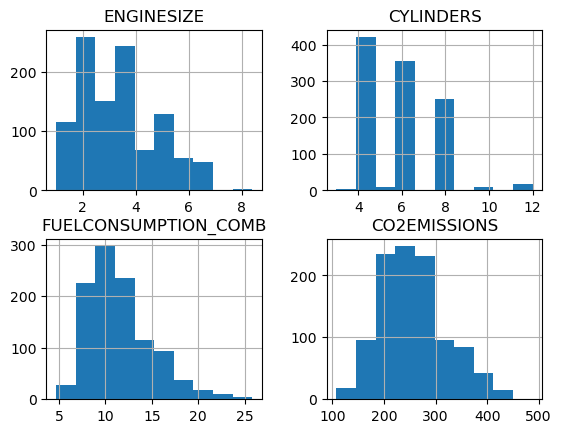

In [26]:
#We can plot each of these features:
viz = cdf
viz.hist()
plt.show()

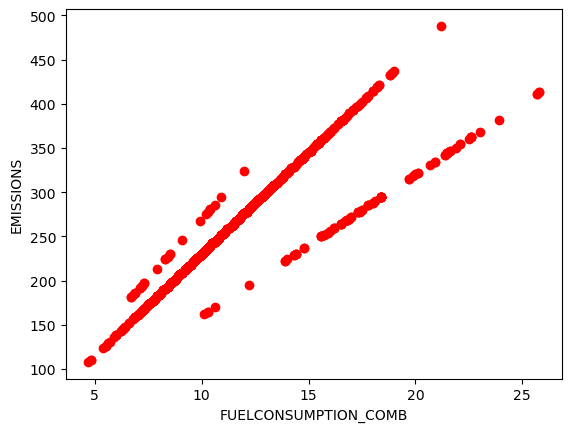

In [29]:
#plot each of these features against the Emission, to see how linear their relationship is:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color = 'red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("EMISSIONS")
plt.show()


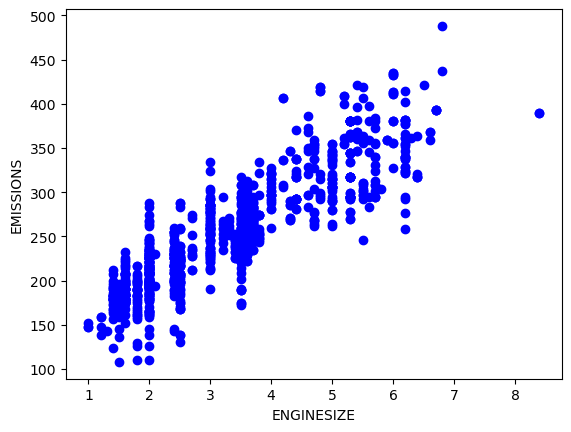

In [33]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color = 'blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSIONS")
plt.show()




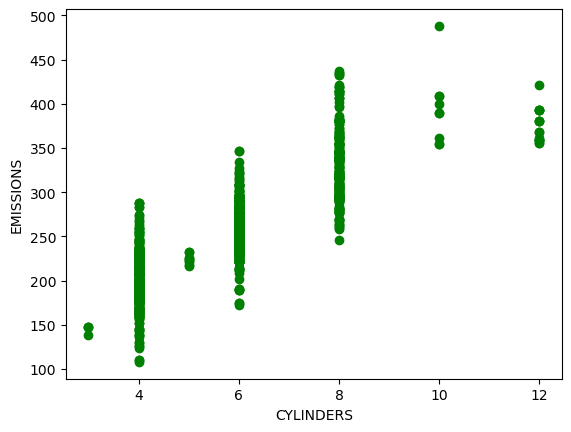

In [35]:
#__CYLINDER__ vs the Emission, to see how linear is their relationship is
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color = 'green')
plt.xlabel("CYLINDERS")
plt.ylabel("EMISSIONS")
plt.show()

# Creating train and test dataset
Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [43]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]


# Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.


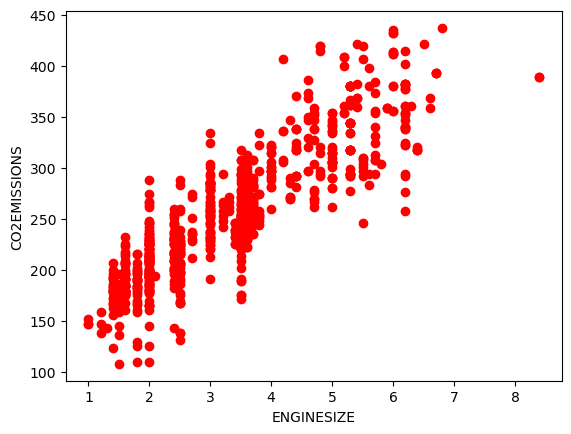

In [44]:
# Train data distribution
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color = 'red')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

# Modeling
Using sklearn package to model data.

In [45]:
from sklearn import linear_model
rgr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
rgr.fit(train_x,train_y)


LinearRegression()

In [49]:
print ("Coefficients: ",rgr.coef_)
print("Intercept: ",rgr.intercept_)

Coefficients:  [[39.25054251]]
Intercept:  [124.84027705]


linear equation is:

y = 10x + 20

Here's what this means:

Coefficient (10): This coefficient indicates that for every 1 unit increase in engine size, fuel consumption increases by 10 units. In other words, a larger engine consumes more fuel.
Intercept (20): The intercept is the fuel consumption when the engine size is 0. 

# Plot outputs

Text(0, 0.5, 'EMISSIONS')

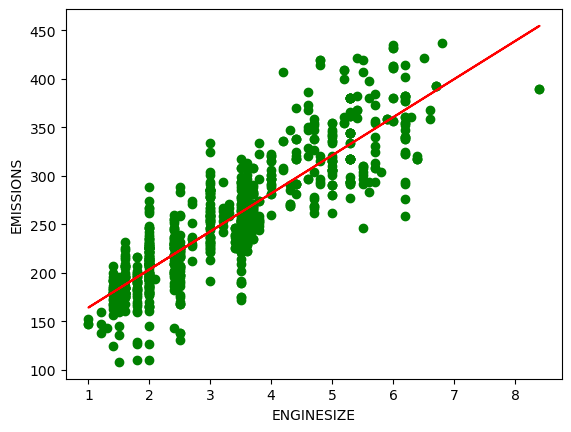

In [51]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color = 'green')
plt.plot(train_x,rgr.coef_[0][0]*train_x + rgr.intercept_[0],'-r')
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSIONS")

## Evaluation

In [52]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_y_ = rgr.predict(test_x)

In [55]:
print ("Mean absolute error : % .2f" % np.mean(np.absolute(test_y_ - test_y)))
print ("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print ("R2-score: %.2f0" % r2_score(test_y , test_y_))

Mean absolute error :  22.84
Residual sum of squares (MSE): 902.57
R2-score: 0.760
